In [ ]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK resources if not already available
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Load the dataset
file_path = 'News_Category_Dataset.csv'
news_data = pd.read_csv(file_path)

# Step 1: Drop the 'link' column
news_data.drop(columns=['link'], inplace=True)

# Step 2: Text preprocessing function
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return ' '.join(tokens)

# Apply preprocessing to 'headline' and 'short_description'
news_data['headline'] = news_data['headline'].apply(preprocess_text)
news_data['short_description'] = news_data['short_description'].apply(preprocess_text)

# Step 3: Drop any rows with missing values (optional, based on data quality)
news_data.dropna(inplace=True)

# Preview the cleaned data
news_data.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [9]:
news_data.to_csv('Cleaned_News_Category_Dataset.csv', index=False)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine 'headline' and 'short_description' into a single text field
news_data['combined_text'] = news_data['headline'] + ' ' + news_data['short_description']

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=2000, stop_words='english')

# Transform the text data into TF-IDF features
X = tfidf.fit_transform(news_data['combined_text'])

# Display the shape of the resulting feature matrix
print(f"TF-IDF feature matrix shape: {X.shape}")


TF-IDF feature matrix shape: (172109, 2000)


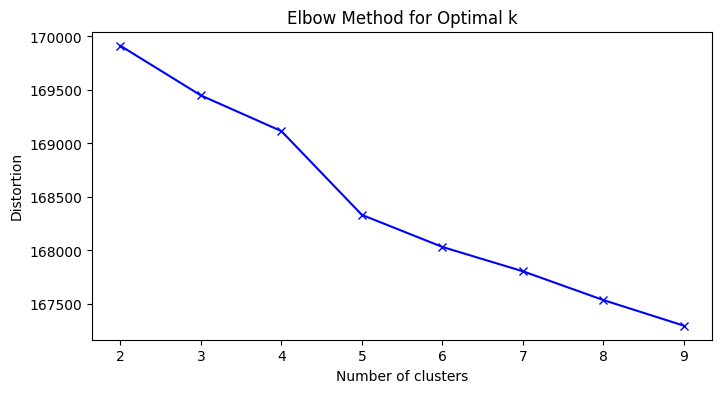

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Initialize K-Means
num_clusters = 2  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Step 2: Fit the model
kmeans.fit(X)

# Step 3: Get cluster labels
labels = kmeans.labels_

# Step 4: Calculate the silhouette score (optional, to evaluate clustering quality)
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Step 5: Add the cluster labels back to the DataFrame
news_data['cluster'] = labels

# Preview the first few rows with cluster labels
news_data[['headline', 'short_description', 'cluster']].head()


Silhouette Score: 0.007564306438440291


,headline,short_description,cluster
0,4 million americans roll sleeves omicrontarget...,health experts said early predict whether dema...,2
1,american airlines flyer charged banned life pu...,subdued passengers crew fled back aircraft con...,2
2,23 funniest tweets cats dogs week sept 1723,dog dont understand could eaten,2
3,funniest tweets parents week sept 1723,accidentally put grownup toothpaste toddler ’ ...,1
4,woman called cops black birdwatcher loses laws...,amy cooper accused investment firm franklin te...,2
